In [ ]:
import pandas as pd
import numpy as np
#数据可视化库(样式更美观)
import seaborn as sns
import os #操作系统接口，用于文件路径操作
%matplotlib inline #笔记内显示图片
from IPython.display import display, HTML
'''
科学计算和统计
scipy.stats:统计函数
    norm, skew:正态分布和偏度计算
    stats:统计模块
'''
from scipy import stats
from scipy.stats import norm, skew 

import matplotlib.pyplot as plt
import matplotlib.pyplot as plotter
#模型选择和验证工具
from sklearn.model_selection import cross_val_score #交叉验证评分
from sklearn import metrics
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin, clone
from sklearn.model_selection import KFold   #K折交叉验证
from sklearn.model_selection import train_test_split    #划分训练集和测试集
'''
sklearn.metrics:模型评估指标
    confusion_matrix:混淆矩阵
    accuracy_score:准确率
    classification_report:分类报告
    mean_squared_error:均方误差
'''
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import  mean_squared_error
'''
sklearn.preprocessing:数据预处理
    StandardScaler:数据标准化
'''
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from keras import layers, models
from keras.models import Sequential
from keras.layers import Dense, Dropout #Dropout层（防止过拟合）
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical #将标签转换为独热编码#用于多分类任务
from keras.callbacks import ReduceLROnPlateau
import warnings
warnings.filterwarnings('ignore')

深度学习（TensorFlow/Keras）
tensorflow (tf)：深度学习框架

tensorflow.keras.models：模型类
>Sequential：顺序模型

tensorflow.keras.layers：神经网络层
>Dense：全连接层

>Dropout：Dropout层（防止过拟合）

tensorflow.keras.callbacks：训练回调
>EarlyStopping：早停策略

>ReduceLROnPlateau：学习率调整策略

tensorflow.keras.utils：工具函数
>to_categorical：将标签转换为独热编码

In [ ]:
train = pd.read_csv('TrafficTwoMonth.csv')
#将数值编码化

df_temp=train
df_temp['Day of the week'] = df_temp['Day of the week'].replace({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday': 6,'Sunday':7})
df_temp['Traffic Situation'] = df_temp['Traffic Situation'].replace({'low': 0,'normal': 1,'high': 2, 'heavy':3})
#train=df_temp '''df_temp与train同一地址'''
train

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,2,13,2,2,24,41,1
1,12:15:00 AM,10,2,14,1,1,36,52,1
2,12:30:00 AM,10,2,10,2,2,32,46,1
3,12:45:00 AM,10,2,10,2,2,36,50,1
4,1:00:00 AM,10,2,11,2,1,34,48,1
...,...,...,...,...,...,...,...,...,...
5947,10:45:00 PM,9,4,16,3,1,36,56,1
5948,11:00:00 PM,9,4,11,0,1,30,42,1
5949,11:15:00 PM,9,4,15,4,1,25,45,1
5950,11:30:00 PM,9,4,16,5,0,27,48,1


In [7]:
# 选择特征和目标变量
features = [ 'CarCount', 'BikeCount', 'BusCount', 'TruckCount','Total']
target = 'Traffic Situation'
# 分割数据集
X = train[features]
y = train[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
train_sizes = np.linspace(0.1, 0.9, 10)#0.1->0.9
TRAIN_SIZE=500

In [11]:
# 假设 X 和 y 已经定义好了
X = train[features]
y = train[target]

# 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 标准化数据
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#将标签转换为独热编码
num_classes = len(np.unique(y))  # 确定类别的数量
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

### BP

In [14]:
# # 构建一个简单的多层感知器神经网络
# def create_model(dropout_rate=0.5):
#     model = Sequential()
#     model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
#     model.add(Dropout(dropout_rate))
#     model.add(Dense(64, activation='relu'))
#     model.add(Dropout(dropout_rate))
#     model.add(Dense(num_classes, activation='softmax'))  # 输出层，num_classes个类别
#     model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#     return model

# # 创建模型
# model = create_model()

# # 使用早停法防止过拟合
# #early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# # 训练模型
# # history = model.fit(X_train, y_train, epochs=TRAIN_SIZE, batch_size=32, 
# #                     validation_split=0.2, callbacks=[early_stopping], verbose=1)
# history = model.fit(X_train, y_train, epochs=TRAIN_SIZE, batch_size=32, 
#                     validation_split=0.2, verbose=1)

# # 评估模型
# y_pred = model.predict(X_test)
# y_pred_classes = np.argmax(y_pred, axis=1)
# y_test_classes = np.argmax(y_test, axis=1)
# test_accuracy = accuracy_score(y_test_classes, y_pred_classes)

# # 计算测试集的均方误差
# y_pred_prob = model.predict(X_test)
# test_mse = mean_squared_error(y_test, y_pred_prob)
# mses.append(mse)
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, mean_squared_error

# 假设你已经有了 X_train, y_train, X_test, y_test, num_classes, TRAIN_SIZE

# 构建一个简单的多层感知器神经网络
def create_model(dropout_rate=0.5):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))  # 输出层，num_classes个类别
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 创建模型
model = create_model()

# 使用早停法防止过拟合
#early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 训练模型
history = model.fit(X_train, y_train, epochs=TRAIN_SIZE, batch_size=32, 
                    validation_split=0.2,  verbose=1)

# 评估模型
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
test_accuracy = accuracy_score(y_test_classes, y_pred_classes)

# 计算测试集的均方误差
y_pred_prob = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred_prob)

# 打印训练集的准确率、损失值、mse
train_accuracy = history.history['accuracy'][-1]
train_loss = history.history['loss'][-1]
train_val_accuracy = history.history['val_accuracy'][-1]
train_val_loss = history.history['val_loss'][-1]

Epoch 1/500
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - accuracy: 0.5133 - loss: 1.1525 - val_accuracy: 0.7818 - val_loss: 0.5833
Epoch 2/500
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.7672 - loss: 0.6134 - val_accuracy: 0.8621 - val_loss: 0.4154
Epoch 3/500
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.8097 - loss: 0.5215 - val_accuracy: 0.8729 - val_loss: 0.3392
Epoch 4/500
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.8340 - loss: 0.4252 - val_accuracy: 0.8849 - val_loss: 0.3025
Epoch 5/500
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.8372 - loss: 0.4031 - val_accuracy: 0.8909 - val_loss: 0.2782
Epoch 6/500
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.8647 - loss: 0.3560 - val_accuracy: 0.8945 - val_loss: 0.2611
Epoch 7/500
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.8691 - loss: 0.3408 - val_accuracy: 0.9029 - val_loss: 0.2437
Epoch 8/500
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.8788 - loss: 0

In [15]:
print(f"训练集准确率: {train_accuracy:.4f}")
print(f"训练集损失值: {train_loss:.4f}")
print(f"验证集准确率: {train_val_accuracy:.4f}")
print(f"验证集损失值: {train_val_loss:.4f}")
print(f"测试集准确率: {test_accuracy:.4f}")
print(f"测试集均方误差 (MSE): {test_mse:.4f}")

训练集准确率: 0.9796
训练集损失值: 0.0795
验证集准确率: 0.9928
验证集损失值: 0.0296
测试集准确率: 0.9910
测试集均方误差 (MSE): 0.0036


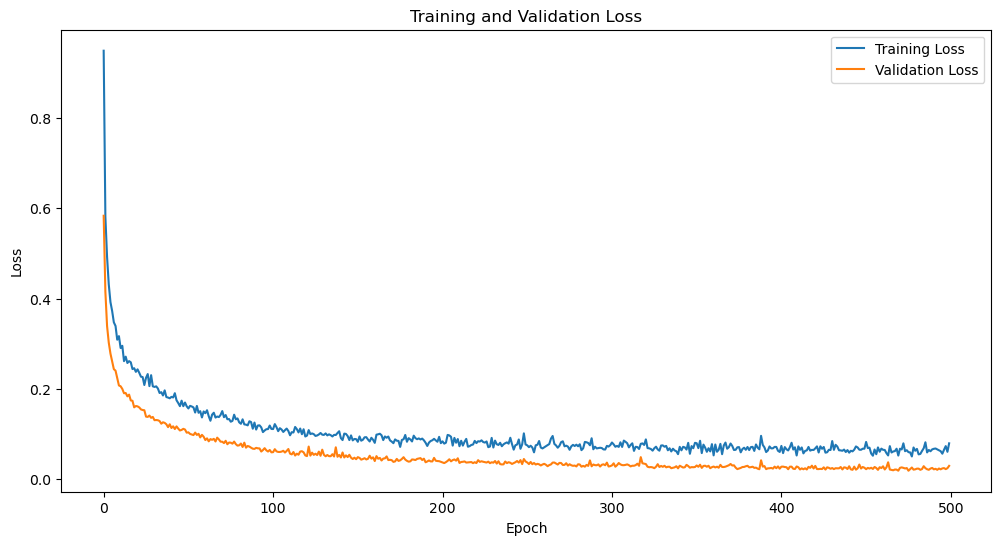

In [16]:
# 绘制训练和验证的损失
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# 保存高清图片
# plt.savefig('bp_loss.png', dpi=300)
plt.show()

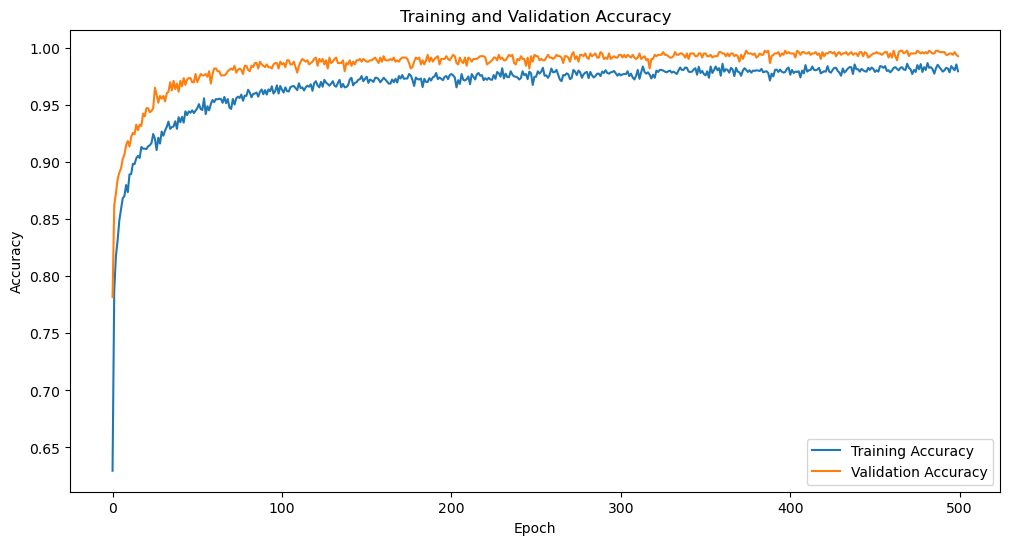

In [20]:
# 绘制训练和验证的准确率
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# 保存高清图片
# plt.savefig('bp_accuracy.png', dpi=300) 
plt.show()

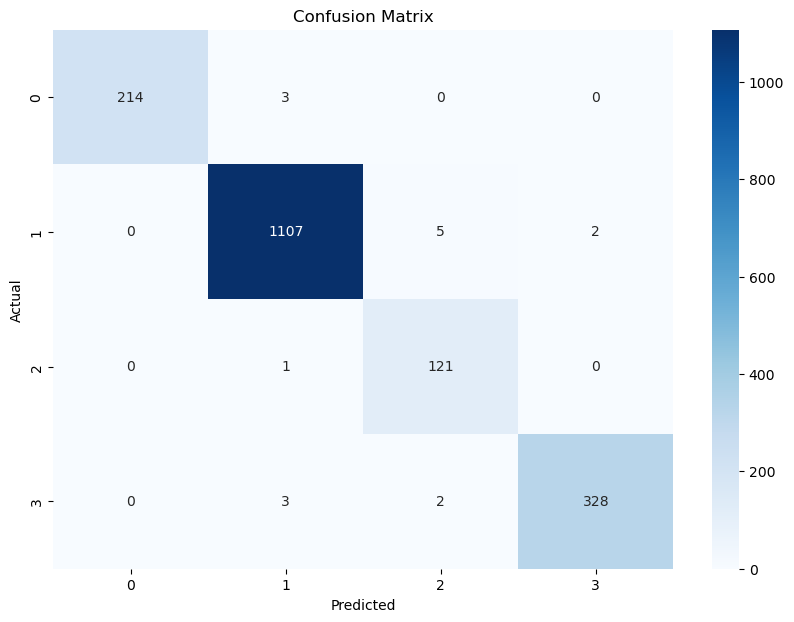

In [22]:
# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# 绘制混淆矩阵
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test_classes), 
            yticklabels=np.unique(y_test_classes))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
# 保存高清图片
plt.savefig('bp_matrix.png', dpi=500)
plt.show()


In [111]:
print(classification_report(y_test_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       217
           1       0.99      0.99      0.99      1114
           2       0.95      0.93      0.94       122
           3       0.96      0.99      0.97       333

    accuracy                           0.98      1786
   macro avg       0.97      0.97      0.97      1786
weighted avg       0.98      0.98      0.98      1786



#### 鲁棒性分析

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 218us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 216us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 220us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 196us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step


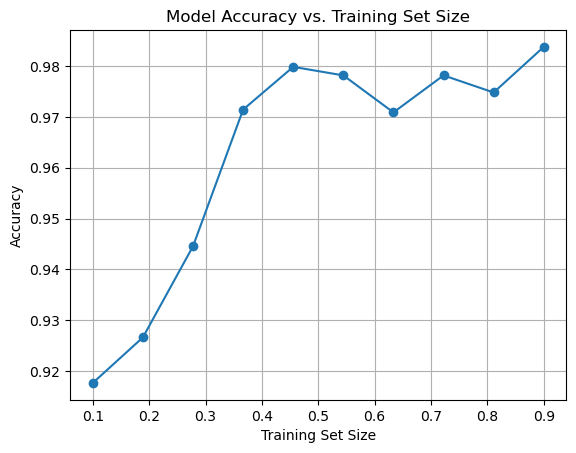

In [113]:
# 构建一个简单的多层感知器神经网络
def create_model(dropout_rate=0.5):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))  # 输出层，num_classes个类别
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 创建模型
model = create_model()

# 使用早停法防止过拟合
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 定义训练集大小的范围
train_sizes = np.linspace(0.1, 0.9, 10)
accuracies = []
mses = []

for size in train_sizes:
    # 按比例缩减训练集
    X_train_reduced, _, y_train_reduced, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)
    
    # 训练模型
    history = model.fit(X_train_reduced, y_train_reduced, epochs=TRAIN_SIZE, batch_size=32, 
                        validation_split=0.2, callbacks=[early_stopping], verbose=0)
    
    # 预测并计算准确率
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)
    test_accuracy = accuracy_score(y_test_classes, y_pred_classes)
    accuracies.append(test_accuracy)
    # 计算MSE
    y_pred_prob = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_prob)
    mses.append(mse)


# 绘制鲁棒性图
plt.plot(train_sizes, accuracies, marker='o')
plt.title('Model Accuracy vs. Training Set Size')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

accuracies_bp=accuracies
mses_bp = mses

In [114]:
# 输出鲁棒性数值
for size, mse in zip(train_sizes, mses_bp):
    print(f'Training Set Size: {size}, Mean Squared Error(均方误差): {mse}')
print('\n')
# 输出鲁棒性数值
for size, mse in zip(train_sizes, accuracies_bp):
    print(f'Training Set Size: {size}, Accuracy:{accuracies}')

Training Set Size: 0.1, Mean Squared Error(均方误差): 0.028329755766862464
Training Set Size: 0.18888888888888888, Mean Squared Error(均方误差): 0.02591379458035341
Training Set Size: 0.2777777777777778, Mean Squared Error(均方误差): 0.020219595568430976
Training Set Size: 0.3666666666666667, Mean Squared Error(均方误差): 0.013062590487577679
Training Set Size: 0.4555555555555556, Mean Squared Error(均方误差): 0.010243765087810837
Training Set Size: 0.5444444444444445, Mean Squared Error(均方误差): 0.010102255517182752
Training Set Size: 0.6333333333333333, Mean Squared Error(均方误差): 0.012188828793226185
Training Set Size: 0.7222222222222222, Mean Squared Error(均方误差): 0.010785428650697884
Training Set Size: 0.8111111111111111, Mean Squared Error(均方误差): 0.01138834984719612
Training Set Size: 0.9, Mean Squared Error(均方误差): 0.010104532430330028


Training Set Size: 0.1, Accuracy:[0.9176931690929452, 0.9266517357222844, 0.944568868980963, 0.971444568868981, 0.9798432250839866, 0.9781634938409854, 0.970884658454647

##### 测试集

In [118]:
accuracies = []
mses = []

# 预测测试集
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# 计算测试集的准确率
test_accuracy = accuracy_score(y_test_classes, y_pred_classes)
accuracies.append(test_accuracy)
print(f"Test Accuracy: {test_accuracy:.4f}")

# 计算测试集的均方误差
y_pred_prob = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_prob)
mses.append(mse)
print(f"Test MSE: {mse:.4f}")
val_loss = history.history['val_loss'][-1]  # 获取最后一个epoch的验证损失值
print(f"Validation Loss: {val_loss:.4f}")

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step
Test Accuracy: 0.9838
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
Test MSE: 0.0101
Validation Loss: 0.0710


### RNN

In [119]:
X = train[features]
y = train[target]

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [121]:
num_samples, num_features = X_train.shape
num_classes = len(np.unique(y_train))

# 构建 LSTM 模型
model = models.Sequential([
    layers.Reshape((num_features, 1), input_shape=(num_features,)),
    layers.LSTM(64, return_sequences=True),
    layers.LSTM(32),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# 编译模型
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 打印模型概述
model.summary()

# 训练模型
history = model.fit(X_train, y_train, epochs=TRAIN_SIZE, validation_data=(X_test, y_test))

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_6 (Reshape)             │ (None, 5, 1)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ (None, 5, 64)          │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,684 (123.77 KB)

 Trainable params: 31,684 (123.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6527 - loss: 0.9551 - val_accuracy: 0.8522 - val_loss: 0.4656
Epoch 2/500
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8565 - loss: 0.3946 - val_accuracy: 0.8897 - val_loss: 0.2897
Epoch 3/500
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8956 - loss: 0.2730 - val_accuracy: 0.8942 - val_loss: 0.2584
Epoch 4/500
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8948 - loss: 0.2586 - val_accuracy: 0.9378 - val_loss: 0.1833
Epoch 5/500
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9200 - loss: 0.2026 - val_accuracy: 0.8611 - val_loss: 0.3201
Epoch 6/500
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9078 - loss: 0.2152 - val_accuracy: 0.8959 - val_loss: 0.2517
Epoch 7/500
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9123 - loss: 0.2309 - val_accuracy: 0.9390 - val_loss: 0.1602
Epoch 8/500
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9364 - loss: 0.1672 - val_accu

In [122]:
# 打印训练集和测试集的准确率、损失值、MSE
train_loss, train_accuracy = model.evaluate(X_train, y_train)
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# 计算训练集和测试集的MSE
y_train_pred = model.predict(X_train)
y_train_pred_classes = np.argmax(y_train_pred, axis=1)
mse_train = mean_squared_error(y_train, y_train_pred_classes)

y_test_pred = model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
mse_test = mean_squared_error(y_test, y_test_pred_classes)

print(f"Training Set Accuracy: {train_accuracy:.4f}")
print(f"Training Set Loss: {train_loss:.4f}")
print(f"Training Set MSE: {mse_train:.4f}")

print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Test Set Loss: {test_loss:.4f}")
print(f"Test Set MSE: {mse_test:.4f}")

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.9959 - loss: 0.0114
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - accuracy: 0.9850 - loss: 0.0577
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training Set Accuracy: 0.9930
Training Set Loss: 0.0189
Training Set MSE: 0.0106
Test Set Accuracy: 0.9826
Test Set Loss: 0.0618
Test Set MSE: 0.0308


分类报告:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       217
           1       0.99      0.99      0.99      1114
           2       0.95      0.93      0.94       122
           3       0.96      0.99      0.97       333

    accuracy                           0.98      1786
   macro avg       0.97      0.97      0.97      1786
weighted avg       0.98      0.98      0.98      1786



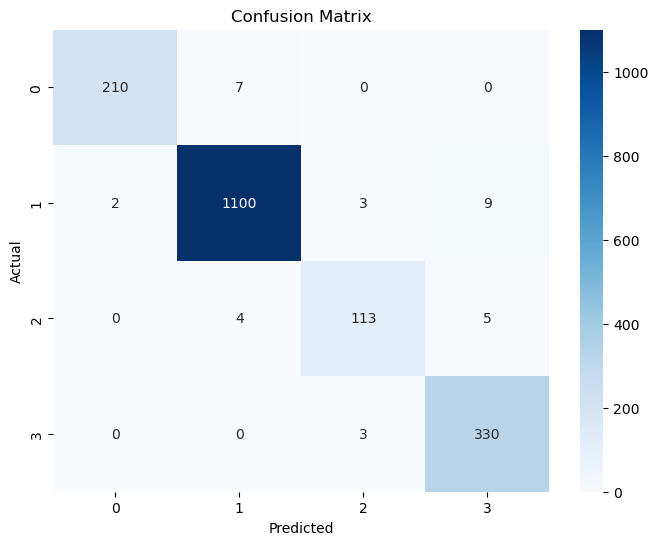

[[ 210    7    0    0]
 [   2 1100    3    9]
 [   0    4  113    5]
 [   0    0    3  330]]


In [124]:
# 生成混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# 打印分类报告
print("分类报告:")
print(classification_report(y_test, y_pred_classes))

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
# 保存高清图片
# plt.savefig('rnn_matrix.png', dpi=300)
plt.show()
print(conf_matrix)

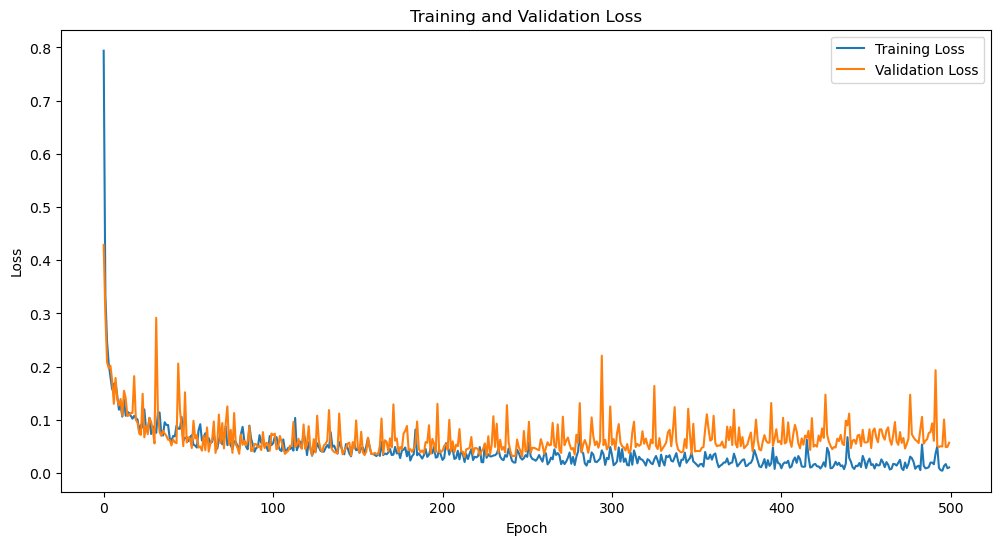

In [68]:
# 绘制训练和验证的损失
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# 保存高清图片
# plt.savefig('rnn_loss.png', dpi=300)
plt.show()

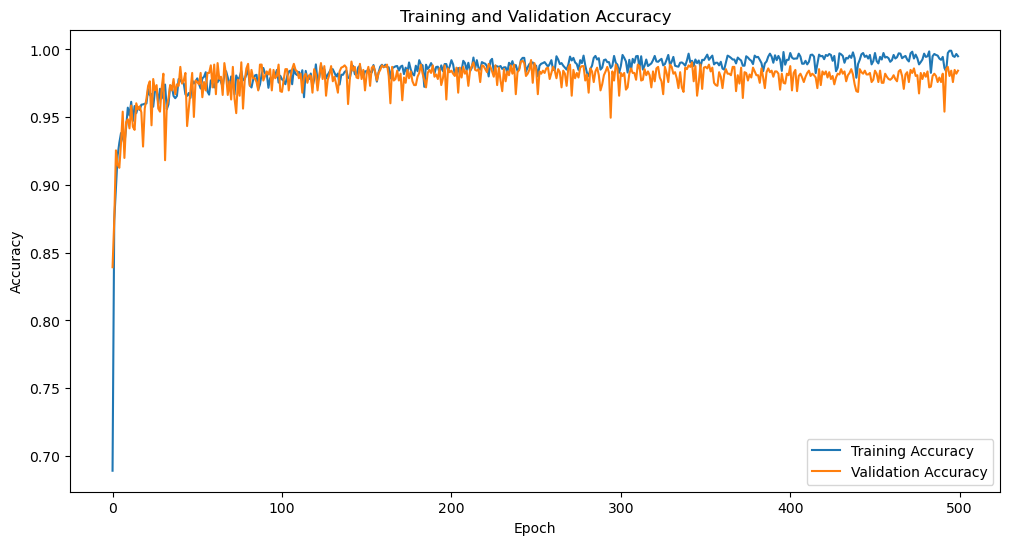

In [70]:
# 绘制训练和验证的准确率
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# 保存高清图片
# plt.savefig('rnn_accuracy.png', dpi=300)
plt.show()

#### 鲁棒性分析

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 193us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 214us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 220us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step


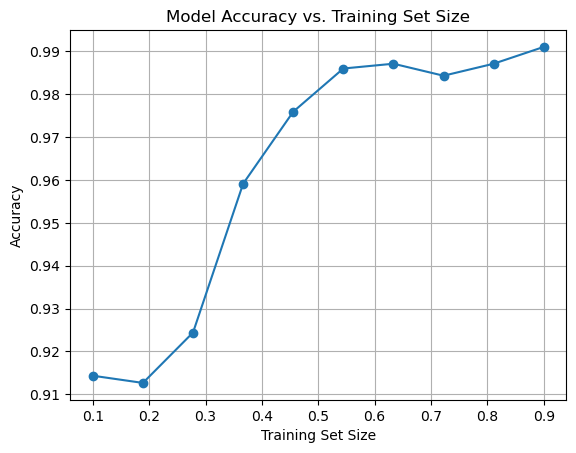

In [222]:
X = train[features]
y = train[target]

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 标准化数据
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 将标签转换为独热编码
num_classes = len(np.unique(y))  # 确定类别的数量
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# 构建一个简单的多层感知器神经网络
def create_model(dropout_rate=0.5):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))  # 输出层，num_classes个类别
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 创建模型
model = create_model()

# 使用早停法防止过拟合
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 定义训练集大小的范围
train_sizes = np.linspace(0.1, 0.9, 10)
accuracies = []
mses = []

for size in train_sizes:
    # 按比例缩减训练集
    X_train_reduced, _, y_train_reduced, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)
    
    # 训练模型
    history = model.fit(X_train_reduced, y_train_reduced, epochs=TRAIN_SIZE, batch_size=32, 
                        validation_split=0.2, callbacks=[early_stopping], verbose=0)
    
    # 预测并计算准确率
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)
    test_accuracy = accuracy_score(y_test_classes, y_pred_classes)
    accuracies.append(test_accuracy)
    # 计算MSE
    y_pred_prob = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_prob)
    mses.append(mse)

# 绘制鲁棒性图
plt.plot(train_sizes, accuracies, marker='o')
plt.title('Model Accuracy vs. Training Set Size')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

accuracies_rnn=accuracies
mse_rnn=mses

In [223]:
# 输出鲁棒性数值
for size, mse in zip(train_sizes, mse_rnn):
    print(f'Training Set Size: {size}, Mean Squared Error(均方误差): {mse}')

Training Set Size: 0.1, Mean Squared Error(均方误差): 0.03120003660809685
Training Set Size: 0.18888888888888888, Mean Squared Error(均方误差): 0.03073789552610503
Training Set Size: 0.2777777777777778, Mean Squared Error(均方误差): 0.02498291229127762
Training Set Size: 0.3666666666666667, Mean Squared Error(均方误差): 0.01648648050667104
Training Set Size: 0.4555555555555556, Mean Squared Error(均方误差): 0.010893838500689423
Training Set Size: 0.5444444444444445, Mean Squared Error(均方误差): 0.0070612427972770765
Training Set Size: 0.6333333333333333, Mean Squared Error(均方误差): 0.00680312948481722
Training Set Size: 0.7222222222222222, Mean Squared Error(均方误差): 0.0072475766176340155
Training Set Size: 0.8111111111111111, Mean Squared Error(均方误差): 0.006769363681973313
Training Set Size: 0.9, Mean Squared Error(均方误差): 0.006238582304357912


In [226]:
# 输出鲁棒性数值
for size, mse in zip(train_sizes, accuracies_rnn):
    print(f'Training Set Size: {size}, Accuracy:{accuracies}')

Training Set Size: 0.1, Accuracy:[0.9143337066069429, 0.9126539753639418, 0.9244120940649496, 0.9591265397536394, 0.9759238521836506, 0.9860022396416573, 0.9871220604703248, 0.9843225083986562, 0.9871220604703248, 0.9910414333706606]
Training Set Size: 0.18888888888888888, Accuracy:[0.9143337066069429, 0.9126539753639418, 0.9244120940649496, 0.9591265397536394, 0.9759238521836506, 0.9860022396416573, 0.9871220604703248, 0.9843225083986562, 0.9871220604703248, 0.9910414333706606]
Training Set Size: 0.2777777777777778, Accuracy:[0.9143337066069429, 0.9126539753639418, 0.9244120940649496, 0.9591265397536394, 0.9759238521836506, 0.9860022396416573, 0.9871220604703248, 0.9843225083986562, 0.9871220604703248, 0.9910414333706606]
Training Set Size: 0.3666666666666667, Accuracy:[0.9143337066069429, 0.9126539753639418, 0.9244120940649496, 0.9591265397536394, 0.9759238521836506, 0.9860022396416573, 0.9871220604703248, 0.9843225083986562, 0.9871220604703248, 0.9910414333706606]
Training Set Size:

##### 测试集

In [243]:
accuracies = []
mses = []

# 预测测试集
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# 计算测试集的准确率
test_accuracy = accuracy_score(y_test_classes, y_pred_classes)
accuracies.append(test_accuracy)
print(f"Test Accuracy: {test_accuracy:.4f}")

# 计算测试集的均方误差
y_pred_prob = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_prob)
mses.append(mse)
print(f"Test MSE: {mse:.4f}")

# 计算测试集的均方误差
y_pred_prob = model.predict(X_test)
val_loss = history.history['val_loss'][-1]  # 获取最后一个epoch的验证损失值
print(f"Loss: {val_loss:.4f}")

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
Test Accuracy: 0.9910
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step
Test MSE: 0.0062
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step
Loss: 0.0603


### LSTM

In [128]:
# 假设 X 和 y 已经定义好了
X = train[features]
y = train[target]

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# 打印数据形状
print("训练数据形状:", X_train.shape)
print("测试数据形状:", X_test.shape)

num_samples, num_features = X_train.shape
num_classes = len(np.unique(y_train))

# 构建 LSTM 模型
model = models.Sequential([
    layers.Reshape((num_features, 1), input_shape=(num_features,)),
    layers.LSTM(64, return_sequences=True),
    layers.Dropout(0.2),  # 添加 Dropout 层
    layers.LSTM(32),
    layers.Dropout(0.2),  # 添加 Dropout 层
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),  # 添加 Dropout 层
    layers.Dense(num_classes, activation='softmax')
])

# 编译模型
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 打印模型概述
model.summary()

训练数据形状: (4166, 5)
测试数据形状: (1786, 5)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_7 (Reshape)             │ (None, 5, 1)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 5, 64)          │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,684 (123.77 KB)

 Trainable params: 31,684 (123.77 KB)

 Non-trainable params: 0 (0.00 B)

In [130]:
# 设置学习率调度器
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.00001)

# 训练模型
history = model.fit(X_train, y_train, epochs=TRAIN_SIZE, validation_data=(X_test, y_test))

Epoch 1/500
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5441 - loss: 1.1034 - val_accuracy: 0.8085 - val_loss: 0.5106
Epoch 2/500
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8108 - loss: 0.5164 - val_accuracy: 0.8667 - val_loss: 0.3314
Epoch 3/500
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8507 - loss: 0.3744 - val_accuracy: 0.8936 - val_loss: 0.2685
Epoch 4/500
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8689 - loss: 0.3338 - val_accuracy: 0.8959 - val_loss: 0.2581
Epoch 5/500
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8677 - loss: 0.3254 - val_accuracy: 0.8964 - val_loss: 0.2487
Epoch 6/500
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8820 - loss: 0.2875 - val_accuracy: 0.9199 - val_loss: 0.1942
Epoch 7/500
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8937 - loss: 0.2768 - val_accuracy: 0.8964 - val_loss: 0.2539
Epoch 8/500
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8891 - loss: 0.2808 - val_accu

In [131]:
# # 评估模型
# test_loss, test_acc = model.evaluate(X_test, y_test)
# print(f'测试准确率: {test_acc:.4f}')

# # 定义预测函数，并指定输入签名
# @tf.function(input_signature=[tf.TensorSpec(shape=(None, num_features), dtype=tf.float32)])
# def predict_step(data):
#     return model(data)

# # 预测测试数据
# y_pred = predict_step(X_test)
# y_pred_classes = np.argmax(y_pred, axis=1)

# # 打印训练集和验证集的准确率和损失值
# train_loss = history.history['loss'][-1]
# train_accuracy = history.history['accuracy'][-1]
# val_loss = history.history['val_loss'][-1]
# val_accuracy = history.history['val_accuracy'][-1]

# print(f'训练集损失值: {train_loss:.4f}')
# print(f'训练集准确率: {train_accuracy:.4f}')
# print(f'验证集损失值: {val_loss:.4f}')
# print(f'验证集准确率: {val_accuracy:.4f}')

分类报告:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       217
           1       0.99      0.99      0.99      1114
           2       0.95      0.93      0.94       122
           3       0.96      0.99      0.97       333

    accuracy                           0.98      1786
   macro avg       0.97      0.97      0.97      1786
weighted avg       0.98      0.98      0.98      1786



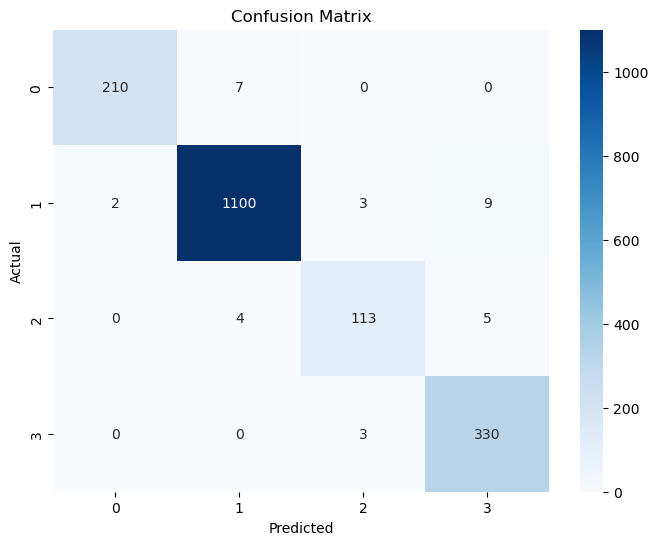

[[ 210    7    0    0]
 [   2 1100    3    9]
 [   0    4  113    5]
 [   0    0    3  330]]


In [132]:
# 生成混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# 打印分类报告
print("分类报告:")
print(classification_report(y_test, y_pred_classes))

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
# 保存高清图片
# plt.savefig('l stm_matrix.png', dpi=300)
plt.show()
print(conf_matrix)

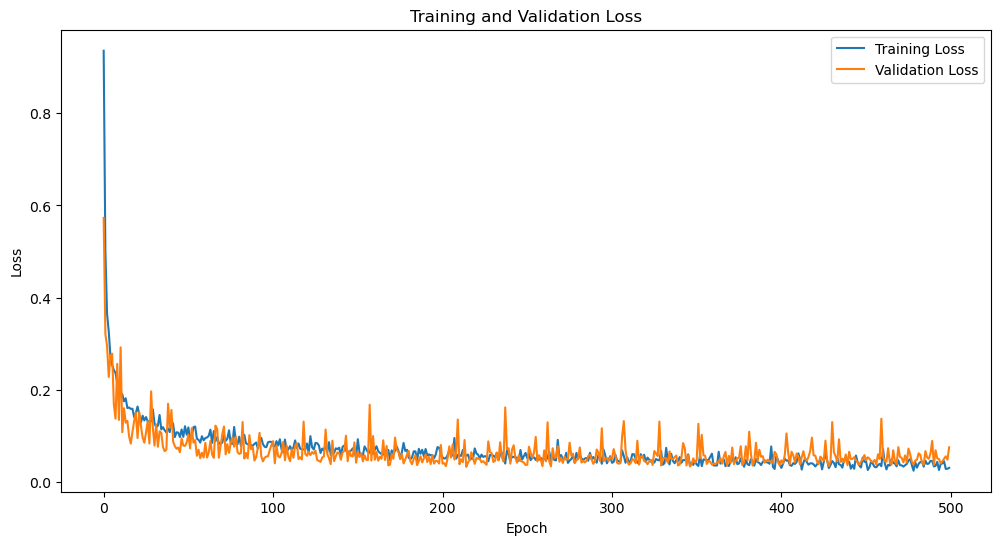

[0.9355962872505188, 0.5015174746513367, 0.36490359902381897, 0.32641708850860596, 0.27199485898017883, 0.2541462779045105, 0.24308475852012634, 0.2365516871213913, 0.2140844762325287, 0.19817069172859192, 0.19441549479961395, 0.19031649827957153, 0.17521904408931732, 0.18179933726787567, 0.1605709195137024, 0.16185614466667175, 0.15878215432167053, 0.15917815268039703, 0.1408328115940094, 0.15020999312400818, 0.16407610476016998, 0.14636512100696564, 0.1293107122182846, 0.14411622285842896, 0.13372457027435303, 0.1410936415195465, 0.13163715600967407, 0.13173061609268188, 0.13179798424243927, 0.15796610713005066, 0.12771765887737274, 0.11907123029232025, 0.1226869598031044, 0.14560462534427643, 0.11441501975059509, 0.1190389022231102, 0.11238420754671097, 0.10761061310768127, 0.11630374193191528, 0.10843507200479507, 0.13392643630504608, 0.12597009539604187, 0.09766144305467606, 0.10814117640256882, 0.10726968199014664, 0.09772729128599167, 0.11427590250968933, 0.09817638993263245, 0.

In [105]:
# 绘制训练和验证的损失
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# 保存高清图片
# plt.savefig('lstm_loss.png', dpi=300)
plt.show()
#print(history.history['loss'])

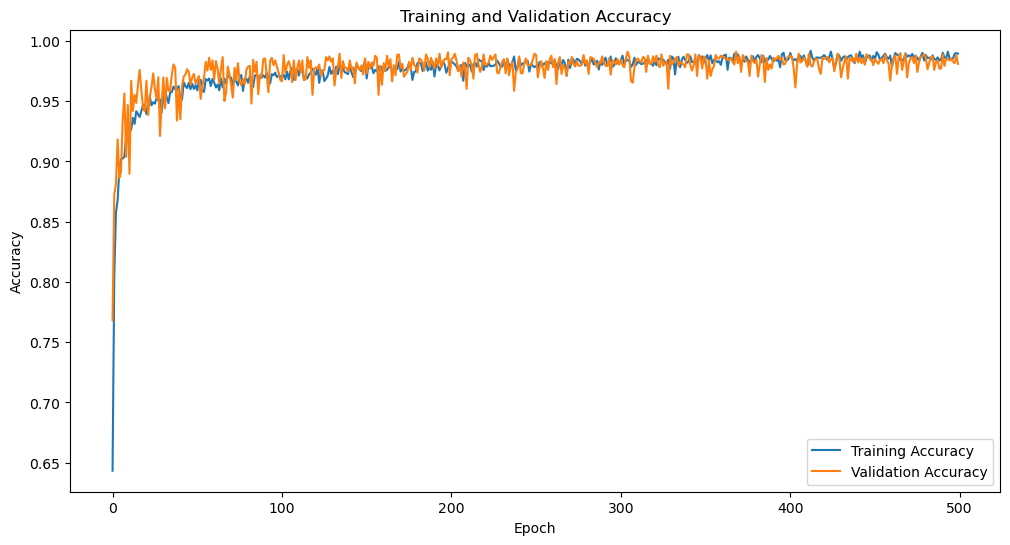

In [103]:
# 绘制训练和验证的准确率
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# 保存高清图片
# plt.savefig('lstm_accuracy.png', dpi=300)
plt.show()

#### 鲁棒性分析

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step


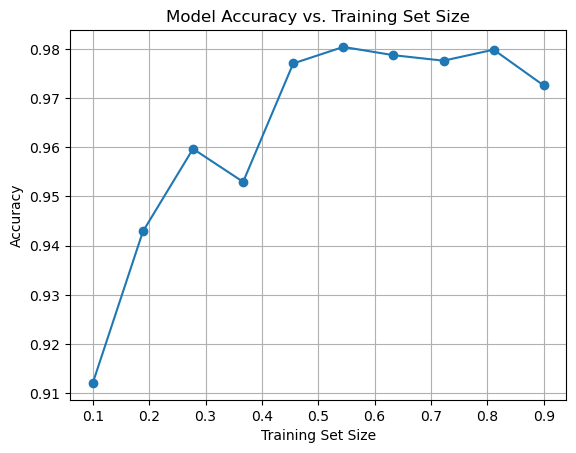

In [259]:
X = train[features]
y = train[target]

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 标准化数据
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 将标签转换为独热编码
num_classes = len(np.unique(y))  # 确定类别的数量
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# 假设每个样本是一个长度为 seq_length 的序列
seq_length = 5  # 调整 seq_length 为 5
input_dim = X_train.shape[1]  # 特征的数量

# 检查 input_dim 是否能够被 seq_length 整除
if input_dim % seq_length != 0:
    raise ValueError(f"input_dim ({input_dim}) 不能被 seq_length ({seq_length}) 整除，请调整 seq_length 或 input_dim")

# 重塑输入数据以适应 LSTM
X_train = X_train.reshape((X_train.shape[0], seq_length, input_dim // seq_length))
X_test = X_test.reshape((X_test.shape[0], seq_length, input_dim // seq_length))

# 构建 LSTM 模型
model = Sequential([
    layers.LSTM(64, return_sequences=True, input_shape=(seq_length, input_dim // seq_length)),
    layers.LSTM(32),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# 编译模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 使用早停法防止过拟合
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 定义训练集大小的范围
train_sizes = np.linspace(0.1, 0.9, 10)
accuracies = []
mses = []

for size in train_sizes:
    # 按比例缩减训练集
    X_train_reduced, _, y_train_reduced, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)
    
    # 训练模型
    history = model.fit(X_train_reduced, y_train_reduced, epochs=TRAIN_SIZE, batch_size=32, 
                        validation_split=0.2, callbacks=[early_stopping], verbose=0)
    
    # 预测并计算准确率
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)
    test_accuracy = accuracy_score(y_test_classes, y_pred_classes)
    accuracies.append(test_accuracy)
    
    # 计算MSE
    mse = mean_squared_error(y_test, y_pred)
    mses.append(mse)

# 绘制鲁棒性图
plt.plot(train_sizes, accuracies, marker='o')
plt.title('Model Accuracy vs. Training Set Size')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# 保存准确率和MSE
accuracies_lstm = accuracies
mses_lstm = mses

In [260]:
# 输出鲁棒性数值
for size, mse in zip(train_sizes, mses_lstm):
    print(f'Training Set Size: {size}, Mean Squared Error(均方误差): {mse}')

Training Set Size: 0.1, Mean Squared Error(均方误差): 0.03402221895105004
Training Set Size: 0.18888888888888888, Mean Squared Error(均方误差): 0.020427841578629948
Training Set Size: 0.2777777777777778, Mean Squared Error(均方误差): 0.015611208063765855
Training Set Size: 0.3666666666666667, Mean Squared Error(均方误差): 0.019289570643020663
Training Set Size: 0.4555555555555556, Mean Squared Error(均方误差): 0.008526435290710115
Training Set Size: 0.5444444444444445, Mean Squared Error(均方误差): 0.0077980110621338125
Training Set Size: 0.6333333333333333, Mean Squared Error(均方误差): 0.008096218396511423
Training Set Size: 0.7222222222222222, Mean Squared Error(均方误差): 0.008344905468922057
Training Set Size: 0.8111111111111111, Mean Squared Error(均方误差): 0.00756130092865218
Training Set Size: 0.9, Mean Squared Error(均方误差): 0.008965336520385876


In [261]:
# 输出鲁棒性数值
for size, mse in zip(train_sizes, accuracies):
    print(f'Training Set Size: {size}, Accuracy:{accuracies}')

Training Set Size: 0.1, Accuracy:[0.9120940649496081, 0.9428891377379619, 0.9596864501679732, 0.9529675251959686, 0.977043673012318, 0.9804031354983203, 0.9787234042553191, 0.9776035834266518, 0.9798432250839866, 0.9725643896976484]
Training Set Size: 0.18888888888888888, Accuracy:[0.9120940649496081, 0.9428891377379619, 0.9596864501679732, 0.9529675251959686, 0.977043673012318, 0.9804031354983203, 0.9787234042553191, 0.9776035834266518, 0.9798432250839866, 0.9725643896976484]
Training Set Size: 0.2777777777777778, Accuracy:[0.9120940649496081, 0.9428891377379619, 0.9596864501679732, 0.9529675251959686, 0.977043673012318, 0.9804031354983203, 0.9787234042553191, 0.9776035834266518, 0.9798432250839866, 0.9725643896976484]
Training Set Size: 0.3666666666666667, Accuracy:[0.9120940649496081, 0.9428891377379619, 0.9596864501679732, 0.9529675251959686, 0.977043673012318, 0.9804031354983203, 0.9787234042553191, 0.9776035834266518, 0.9798432250839866, 0.9725643896976484]
Training Set Size: 0.4

#### 测试集

In [267]:
accuracies = []
mses = []

# 预测测试集
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# 计算测试集的准确率
test_accuracy = accuracy_score(y_test_classes, y_pred_classes)
accuracies.append(test_accuracy)
print(f"Test Accuracy: {test_accuracy:.4f}")

# 计算测试集的均方误差
y_pred_prob = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_prob)
mses.append(mse)
print(f"Test MSE: {mse:.4f}")

# 计算测试集的均方误差
y_pred_prob = model.predict(X_test)
val_loss = history.history['val_loss'][-1]  # 获取最后一个epoch的验证损失值
print(f"Loss: {val_loss:.4f}")

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step
Test Accuracy: 0.9726
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step
Test MSE: 0.0090
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step
Loss: 0.0621


## 综合分析

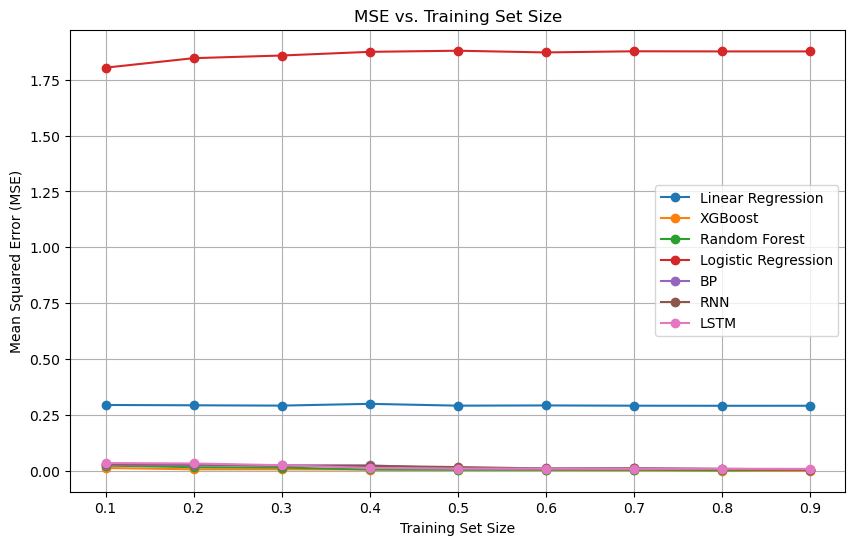

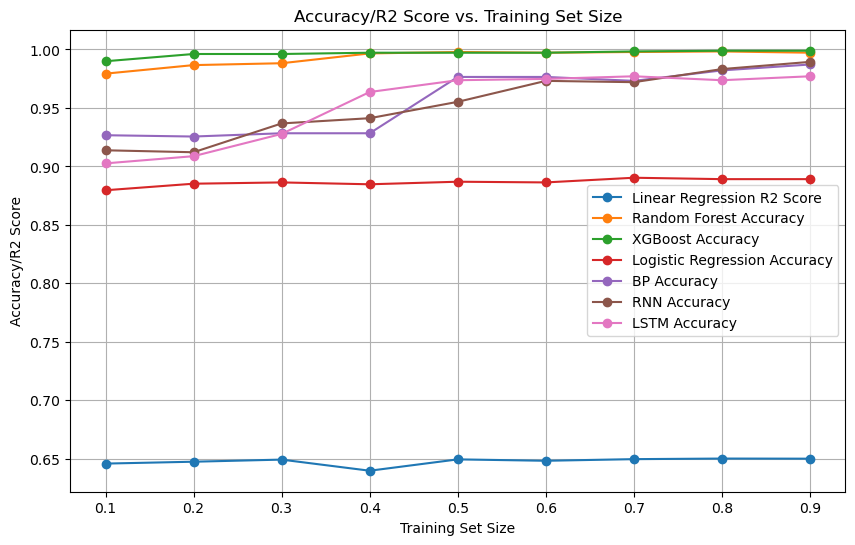

In [85]:
import matplotlib.pyplot as plt
import pandas as pd

# 数据
train_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# MSE 数据
lr_mse = [0.29511030788549875, 0.29374066332130033, 0.292279062667602, 0.3002253902637243, 0.2920748864122741, 0.29309004897605395, 0.291899441470521, 0.29154920217001007, 0.2916399800538478]
xgb_mse = [0.0134, 0.0073, 0.0073, 0.0062, 0.0062, 0.0045, 0.0034, 0.0011, 0.0011]
rf_mse = [0.024076147816349383, 0.0167973124300112, 0.015117581187010079, 0.006718924972004479, 0.005599104143337066, 0.006159014557670772, 0.005599104143337066, 0.0033594624860022394, 0.006159014557670772]
logreg_mse = [1.8036256175529897, 1.8461399182659821, 1.8580177903693254, 1.8744561324127205, 1.879424241356545, 1.8717825486586634, 1.876955433718981, 1.8763444111204695, 1.8763138483581774]

# BP神经网络的MSE
bp_mses = [0.026136726053368132, 0.025688396549892734, 0.025161557762717328, 0.025200929407357034, 0.011275235784310928, 0.010556126785781538, 0.01168059524738707, 0.009721708015075632, 0.0062638532458100145]

# RNN神经网络的MSE
rnn_mses = [0.03044351300259232, 0.030637848538375683, 0.02288104787328884, 0.022537707436607404, 0.017395043428894648, 0.011198844956446864, 0.011707619208276388, 0.008715204967920906, 0.006524441074447522]

# LSTM神经网络的MSE
lstm_mses = [0.03541763686428486, 0.033470842745731776, 0.02565364787328884, 0.01348703769279137, 0.010825634492628338, 0.010407518112303227, 0.009577418447694733, 0.009845890419731856, 0.00939607994312281]

# Accuracy/R2 Score 数据
lr_r2_scores = [0.6459, 0.6475, 0.6493, 0.6398, 0.6495, 0.6483, 0.6497, 0.6502, 0.6501]
rf_accuracies = [0.9793, 0.9866, 0.9882, 0.9966, 0.9978, 0.9972, 0.9978, 0.9983, 0.9972]
xgb_accuracies = [0.9899, 0.9961, 0.9961, 0.9972, 0.9972, 0.9972, 0.9983, 0.9989, 0.9989]
logreg_accuracies = [0.8796, 0.8852, 0.8863, 0.8847, 0.8869, 0.8863, 0.8903, 0.8891, 0.8891]
bp_accuracies = [0.9266517357222844, 0.925531914893617, 0.9283314669652856, 0.9283314669652856, 0.9764837625979843, 0.9764837625979843, 0.973124300111982, 0.9820828667413214, 0.9871220604703248]
rnn_accuracies = [0.9137737961926092, 0.9120940649496081, 0.9367301231802911, 0.9412094064949608, 0.9552071668533034, 0.973124300111982, 0.9720044792833147, 0.9832026875699889, 0.9893617021276596]
lstm_accuracies = [0.9025755879059351, 0.9087346024636058, 0.9277715565509519, 0.9636058230683091, 0.9736842105263158, 0.9748040313549832, 0.977043673012318, 0.9736842105263158, 0.977043673012318]

# 创建MSE的DataFrame
mse_data = {
    'Training Set Size': train_sizes,
    'Linear Regression MSE': lr_mse,
    'XGBoost MSE': xgb_mse,
    'Random Forest MSE': rf_mse,
    'Logistic Regression MSE': logreg_mse,
    'BP MSE': bp_mses,
    'RNN MSE': rnn_mses,
    'LSTM MSE': lstm_mses
}

mse_df = pd.DataFrame(mse_data)

# 创建Accuracy/R2 Score的DataFrame
accuracy_data = {
    'Training Set Size': train_sizes,
    'Linear Regression R2 Score': lr_r2_scores,
    'Random Forest Accuracy': rf_accuracies,
    'XGBoost Accuracy': xgb_accuracies,
    'Logistic Regression Accuracy': logreg_accuracies,
    'BP Accuracy': bp_accuracies,
    'RNN Accuracy': rnn_accuracies,
    'LSTM Accuracy': lstm_accuracies
}

accuracy_df = pd.DataFrame(accuracy_data)

# 生成Excel文件
with pd.ExcelWriter('model_performance.xlsx') as writer:
    mse_df.to_excel(writer, sheet_name='MSE', index=False)
    accuracy_df.to_excel(writer, sheet_name='Accuracy', index=False)

# 绘制MSE图表
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, mse_data['Linear Regression MSE'], label='Linear Regression', marker='o')
plt.plot(train_sizes, mse_data['XGBoost MSE'], label='XGBoost', marker='o')
plt.plot(train_sizes, mse_data['Random Forest MSE'], label='Random Forest', marker='o')
plt.plot(train_sizes, mse_data['Logistic Regression MSE'], label='Logistic Regression', marker='o')
plt.plot(train_sizes, mse_data['BP MSE'], label='BP', marker='o')
plt.plot(train_sizes, mse_data['RNN MSE'], label='RNN', marker='o')
plt.plot(train_sizes, mse_data['LSTM MSE'], label='LSTM', marker='o')

plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Training Set Size')
plt.legend()
plt.grid(True)
# 保存高清图片
# plt.savefig('mse_chart.png', dpi=500)
plt.show()

# 绘制Accuracy/R2 Score图表
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, accuracy_data['Linear Regression R2 Score'], label='Linear Regression R2 Score', marker='o')
plt.plot(train_sizes, accuracy_data['Random Forest Accuracy'], label='Random Forest Accuracy', marker='o')
plt.plot(train_sizes, accuracy_data['XGBoost Accuracy'], label='XGBoost Accuracy', marker='o')
plt.plot(train_sizes, accuracy_data['Logistic Regression Accuracy'], label='Logistic Regression Accuracy', marker='o')
plt.plot(train_sizes, accuracy_data['BP Accuracy'], label='BP Accuracy', marker='o')
plt.plot(train_sizes, accuracy_data['RNN Accuracy'], label='RNN Accuracy', marker='o')
plt.plot(train_sizes, accuracy_data['LSTM Accuracy'], label='LSTM Accuracy', marker='o')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy/R2 Score')
plt.title('Accuracy/R2 Score vs. Training Set Size')
plt.legend()
plt.grid(True)
# 保存高清图片
# plt.savefig('accuracy_chart.png', dpi=500)
plt.show()

# # 生成Excel文件
# with pd.ExcelWriter('model_performance.xlsx') as writer:
#     mse_df.to_excel(writer, sheet_name='MSE', index=False)
#     accuracy_df.to_excel(writer, sheet_name='Accuracy', index=False)

# print("数据已成功保存到 model_performance.xlsx 文件中")